In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df_train.drop(['PassengerId','Ticket', 'Cabin', 'Name'], axis=1, inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(mean_age, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
most_frequent_embarked = df_train['Embarked'].mode()[0]
df_train['Embarked'].fillna(most_frequent_embarked, inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [ ]:
df_train.isnull().count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64

In [ ]:
df_train['Age'] = df_train['Age'].round(1)
df_train['Fare'] = df_train['Fare'].round(1)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2,S
1,1,1,female,38.0,1,0,71.3,C
2,1,3,female,26.0,0,0,7.9,S
3,1,1,female,35.0,1,0,53.1,S
4,0,3,male,35.0,0,0,8.0,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0,S
887,1,1,female,19.0,0,0,30.0,S
888,0,3,female,29.7,1,2,23.4,S
889,1,1,male,26.0,0,0,30.0,C


In [ ]:
df_train = pd.get_dummies(df_train, columns=['Sex', 'Embarked','Pclass'], drop_first=False)
df_train

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2,0,1,0,0,1,0,0,1
1,1,38.0,1,0,71.3,1,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9,1,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1,1,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0,0,1,0,0,1,0,1,0
887,1,19.0,0,0,30.0,1,0,0,0,1,1,0,0
888,0,29.7,1,2,23.4,1,0,0,0,1,0,0,1
889,1,26.0,0,0,30.0,0,1,1,0,0,1,0,0


In [ ]:
df_train.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2',
       'Pclass_3'],
      dtype='object')

In [ ]:
X = df_train[['Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2','Pclass_3']]
y = df_train['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
best_score = 0
best_k = 0
scores_list = []

for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    mean_score = scores.mean()
    scores_list.append(mean_score)
    if mean_score > best_score:
        best_score = mean_score
        best_k = k

print(f"Optimal number of neighbors (k): {best_k}")

Optimal number of neighbors (k): 3


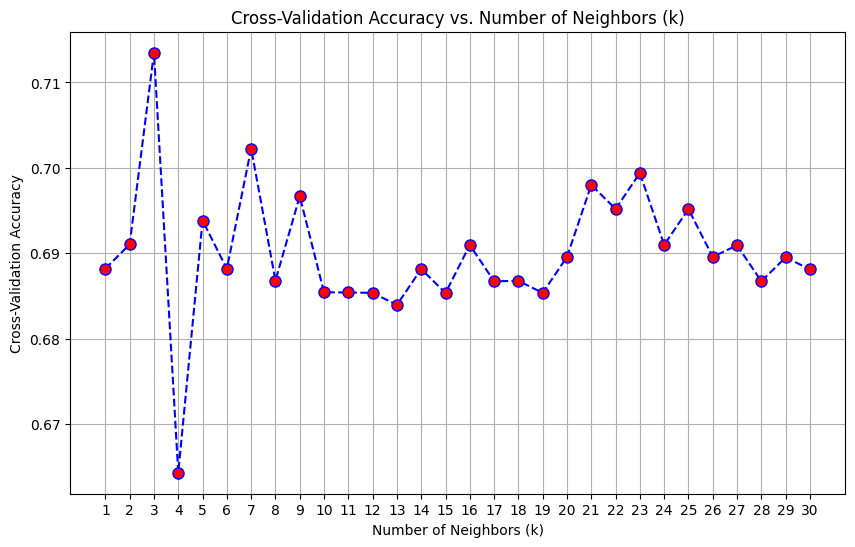

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 31), scores_list, marker='o', linestyle='dashed', color='b', markerfacecolor='r', markersize=8)
plt.title('Cross-Validation Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(range(1, 31))
plt.grid(True)
plt.show()

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k, metric='manhattan')
knn.fit(X_train_scaled, y_train)

accuracy = knn.score(X_test_scaled, y_test)
accuracy

0.8268156424581006

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test_scaled)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[93 12]
 [19 55]]


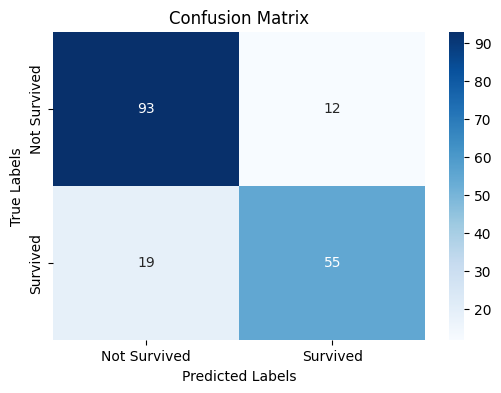

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

class_labels = ['Not Survived', 'Survived']

confusion_df = pd.DataFrame(conf_matrix, index=class_labels, columns=class_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_df, annot=True, cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
input_data = {
    'Age': [25],
    'SibSp': [1],
    'Parch': [0],
    'Fare': [20],
    'Sex_female': [1],
    'Sex_male': [0],
    'Embarked_C': [1],
    'Embarked_Q': [0],
    'Embarked_S': [1],
    'Pclass_1': [1],
    'Pclass_2': [0],
    'Pclass_3': [0]
}

input_df = pd.DataFrame(input_data)

prediction = knn.predict(input_df)

print("Predicted Survival Status:", prediction[0])

Predicted Survival Status: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
